In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import anderson
import scipy as scipy
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest
from scipy.stats import shapiro

In [2]:
#data = np.genfromtxt('./data/18_pdf_19.csv', delimiter=',')
#data = np.genfromtxt('./data/data_test.csv', delimiter=',')
#data_all = pd.read_csv("./data/18_pdf_18_all.csv")
#data_all = pd.read_csv("./data/test_3.csv")
data_handle = pd.read_csv('./data/set3_all_test.csv')
print (data_handle)

         X    Y  PCI  RSRP
0      664  179   39 -94.1
1      664  179   39 -94.0
2      664  179   39 -93.9
3      664  179   39 -91.4
4      664  179   39 -90.9
5      664  179   39 -91.8
6      664  179   39 -93.7
7      664  179   39 -91.8
8      664  179   39 -91.3
9      664  179   39 -90.9
10     664  179   39 -92.2
11     664  179   39 -91.6
12     664  179   39 -92.2
13     664  179   39 -93.1
14     664  179   39 -89.6
15     664  179   39 -88.8
16     664  179   39 -90.6
17     664  179   39 -91.1
18     664  179   39 -88.6
19     664  179   39 -88.1
20     664  179   39 -88.1
21     664  179   39 -88.4
22     664  179   39 -88.3
23     664  179   39 -88.9
24     664  179   39 -90.1
25     664  179   39 -89.5
26     664  179   39 -88.9
27     664  179   39 -88.9
28     664  179   39 -89.2
29     664  179   39 -88.6
...    ...  ...  ...   ...
54925  253  209   37 -81.6
54926  253  209   37 -81.6
54927  253  209   37 -81.6
54928  253  209   37 -81.6
54929  253  209   37 -81.8
5

In [ ]:
def number_drift(data):
    
    x = np.arange(0,10,1)
    sigma = 1
    def norm_pdf(x,mu,sigma):
        pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))    
        return pdf

    mu = 0    
    plt.hist(data, bins=100, alpha=0.7)
    y = norm_pdf(x, mu, sigma)
    #plt.plot(x,y, color='orange', lw=3)
    plt.show()
    
    sns.distplot(data)

/home/reed/anaconda3/envs/reed_env/lib/python3.7/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
/home/reed/anaconda3/envs/reed_env/lib/python3.7/site-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

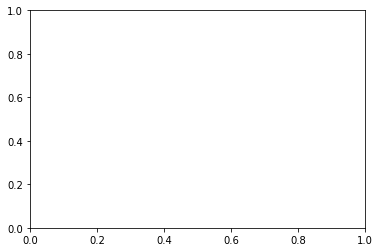

In [19]:
number_drift(data)

In [ ]:
def group(data_all):
    X_group_mean = data_all.groupby('PCI').mean()
    X_group_std = data_all.groupby('PCI').std()
    X_group_median = data_all.groupby('PCI').median()
    #X_group_mean = data_all.mean()
    #X_group_std = data_all.std()
    #X_group_median = data_all.median()
    print (X_group_mean)
    print (X_group_std)
    print (X_group_median)
    return X_group_mean,X_group_std

In [ ]:
#X_group_mean,X_group_std = group(data_all)
#group(data_all)

In [ ]:
#x = np.linspace(-15, 15, 9)
x = np.array([1,1,1,1,1,100,100,50,23,19])
#np.savetxt('x.csv', x, delimiter=',', fmt='%f')
#anderson(data, dist ='norm' )
scipy.stats.scoreatpercentile(data, 95)


In [ ]:
print (scipy.stats.normaltest (data, axis=0))
k2,p = scipy.stats.normaltest (data, axis=0)
alpha = 0.05
if p < alpha:
    print("Sample does not look Gaussian (reject H0),NOT")
else:
    print("Sample looks Gaussian (fail to reject H0),YES Gaussian!!")

In [ ]:
scipy.stats.shapiro(data)

In [ ]:
##### Anderson-Darling Test #####
# seed the random number generator
seed(1)
# normality test
#data = 5 * randn(100) + 50
result = anderson(data)

print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [ ]:
##### D’Agostino’s K^2 Test #####
# normality test
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [ ]:
##### Shapiro-Wilk Test #####
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [3]:
def group_drift(data_handle):
    #df.groupby('X','Y','PCI').transform(lambda x: x - x.mean())
    group_mean = data_handle.groupby(['X','Y','PCI']).mean()
    group_drift = data_handle.groupby(['X','Y','PCI']).transform(lambda x: x - x.mean())
    return group_mean,group_drift

In [4]:
group_mean,group_drift = group_drift(data_handle)
print (group_mean)
group_mean.to_csv('group_mean.csv')

                   RSRP
X   Y   PCI            
113 202 37  -110.180000
        39  -115.000000
    221 37  -116.585714
        39  -119.691304
114 184 37  -116.385714
127 184 37  -119.250000
        39  -124.875000
129 202 37  -119.433333
        39  -124.860000
    221 37  -119.250000
        39  -123.133333
135 212 37  -100.953333
        39  -106.982353
148 211 37   -96.856497
        39  -103.400000
164 213 37  -100.440870
177 212 37   -98.876772
193 212 37   -94.596491
208 212 37   -90.343939
222 211 37   -85.604851
237 212 37   -83.239453
253 209 37   -82.021795
270 211 37   -87.312821
283 212 37   -94.737594
297 211 37   -94.865690
313 211 37   -90.679167
326 212 37  -101.739130
338 211 37  -106.900000
        38  -115.450000
        39  -107.275000
...                 ...
830 125 41   -86.230508
        247 -126.620202
    150 41   -84.688645
832 212 41   -87.232700
844 210 41   -97.218341
850 183 42  -100.069048
    200 39  -107.900000
        42   -97.611522
    223 39  -108

In [5]:
print (group_drift)

           RSRP
0     -6.617152
1     -6.517152
2     -6.417152
3     -3.917152
4     -3.417152
5     -4.317152
6     -6.217152
7     -4.317152
8     -3.817152
9     -3.417152
10    -4.717152
11    -4.117152
12    -4.717152
13    -5.617152
14    -2.117152
15    -1.317152
16    -3.117152
17    -3.617152
18    -1.117152
19    -0.617152
20    -0.617152
21    -0.917152
22    -0.817152
23    -1.417152
24    -2.617152
25    -2.017152
26    -1.417152
27    -1.417152
28    -1.717152
29    -1.117152
...         ...
54925  0.421795
54926  0.421795
54927  0.421795
54928  0.421795
54929  0.221795
54930  0.221795
54931  0.221795
54932  0.321795
54933  0.421795
54934  0.421795
54935  0.521795
54936  0.421795
54937  0.321795
54938  0.421795
54939  0.321795
54940  0.421795
54941  0.421795
54942  0.421795
54943  0.221795
54944  1.021795
54945 -0.278205
54946  0.521795
54947  0.521795
54948 -1.378205
54949 -0.778205
54950 -0.778205
54951 -0.278205
54952 -1.178205
54953 -2.378205
54954 -1.578205

[54955 

In [6]:
print(group_drift[11841:11884])  
group_drift.to_csv('group_drift.csv')

           RSRP
11841  1.131737
11842  2.231737
11843  2.031737
11844  1.531737
11845  1.531737
11846  1.531737
11847  1.331737
11848 -0.468263
11849 -0.768263
11850 -0.768263
11851 -1.268263
11852  0.331737
11853 -0.068263
11854 -0.068263
11855 -0.168263
11856  1.731737
11857  1.631737
11858  1.931737
11859  2.031737
11860  2.031737
11861  1.731737
11862  1.631737
11863  1.031737
11864  1.431737
11865  1.231737
11866  1.531737
11867  1.531737
11868  1.331737
11869  1.531737
11870  1.531737
11871  1.331737
11872  1.431737
11873  1.831737
11874  1.731737
11875  1.731737
11876  1.231737
11877  1.031737
11878  1.231737
11879  1.031737
11880  0.831737
11881  0.531737
11882  0.831737
11883  0.831737


In [7]:
#data = np.genfromtxt('./data/data_test.csv', delimiter=',')

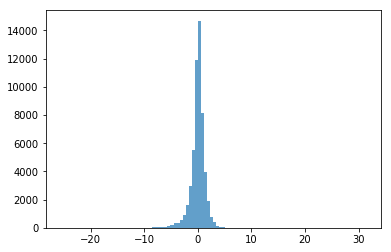

/home/reed/anaconda3/envs/reed_env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


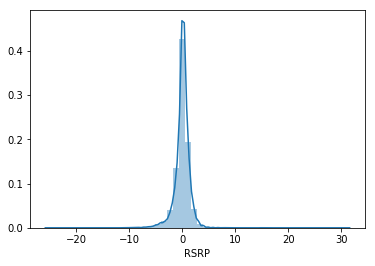

In [8]:
def number_drift(group_drift):
    
    x = np.arange(0,10,1)
    sigma = 1
    def norm_pdf(x,mu,sigma):
        pdf = np.exp(-((x - mu)**2) / (2* sigma**2)) / (sigma * np.sqrt(2*np.pi))    
        return pdf

    mu = 0    
    plt.hist(group_drift, bins=100, alpha=0.7)
    y = norm_pdf(x, mu, sigma)
    #plt.plot(x,y, color='orange', lw=3)
    plt.show()
    
    sns.distplot(group_drift)
number_drift(group_drift['RSRP'])

In [9]:
##### Shapiro-Wilk Test #####
# normality test
stat, p = shapiro(group_drift['RSRP'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.838, p=0.000
Sample does not look Gaussian (reject H0)


/home/reed/anaconda3/envs/reed_env/lib/python3.7/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
